In [1]:
#LIBS to be used 

from MDPlus.core import Fasu, Cofasu
from MDPlus.analysis import pca
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

#getting details automatically from files
import glob
import csv
import pandas as pd
import time
import datetime

#saving data 
import pickle

import mdtraj as md

from MDPlus import fastfitting



In [2]:
def save_object(obj, filename, atm, folder):
    with open(atm+folder+filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def load_object(filename, atm, folder):
    with open(atm+folder+filename, 'rb') as datainput:
        k = pickle.load(datainput)
        #pickle.load(obj, datainput, pickle.HIGHEST_PROTOCOL)
        print filename, " is now loaded"
        #print obj.shape
        return k;

In [3]:
deshaw_pdb_workingdir = '/home/feb23/Documents/jha/extasy/bpti/protein_pdb'

# note - takes 11 min to run on my laptop

do_de_rmsd=0
if do_de_rmsd==1:
    # calculated RMSD from c (de shaw traj) data with 5 pdb sturctures given by de shaw
    # this is good for testing and comparing values with our data 
    
    dermsd_index_list = []
    dermsd_values_list = []
    dermsd_data_list = []

    for i in range(1,6):
        pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
        pdbload = deshaw_pdb_workingdir +'/'+pdb
        pdb_obj = md.load(pdbload, top)
        print type(pdb_obj)
        po_fasu = Fasu(pdb_obj)
        print type(po_fasu)
        po_cofasu = Cofasu(po_fasu)
        print type(po_cofasu)
        print po_cofasu.shape
        print c.shape
        target_structure = po_cofasu[0]
        dermsds = fastfitting.rmsd_traj(c, target_structure)
        print pdb
        print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(dermsds), dermsds.min())
        #dermsd_list.append(dermsds)
        dermsd_index_list.append(np.argmin(dermsds))
        dermsd_values_list.append(dermsds.min())
        dermsd_data_list.append(dermsds)

    # save results for loading later ( takes about 11 min to run on laptop)
    filename = 'dermsd_index_list.pkl'
    save_object(dermsd_index_list,filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','')

    filename = 'dermsd_values_list.pkl'
    save_object(dermsd_values_list,filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','')

    filename = 'dermsd_data_list.pkl'
    save_object(dermsd_data_list,filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','')

else:
    
    # load results for use in other places later on 
    filename = 'dermsd_index_list.pkl'
    dermsd_index_list = load_object(filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','')

    filename = 'dermsd_values_list.pkl'
    dermsd_values_list = load_object(filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','')

    filename = 'dermsd_data_list.pkl'
    dermsd_data_list = load_object(filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','') 
    
    
    for i in range(1,6):
        pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
        print " "
        print pdb
        print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(dermsd_index_list[i-1], dermsd_values_list[i-1])
                                                                                           
  
    

dermsd_index_list.pkl  is now loaded
dermsd_values_list.pkl  is now loaded
dermsd_data_list.pkl  is now loaded
 
CA_1187409s_pdb1.pdb
The closest match to the target was snapshot 8115 with rmsd 0.64 angstroms
 
CA_1187409s_pdb2.pdb
The closest match to the target was snapshot 40364 with rmsd 0.56 angstroms
 
CA_1187409s_pdb3.pdb
The closest match to the target was snapshot 82735 with rmsd 0.88 angstroms
 
CA_1187409s_pdb4.pdb
The closest match to the target was snapshot 53123 with rmsd 0.50 angstroms
 
CA_1187409s_pdb5.pdb
The closest match to the target was snapshot 66225 with rmsd 0.00 angstroms


(103125, 58, 3)


/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


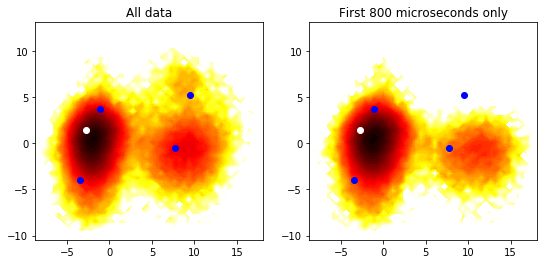

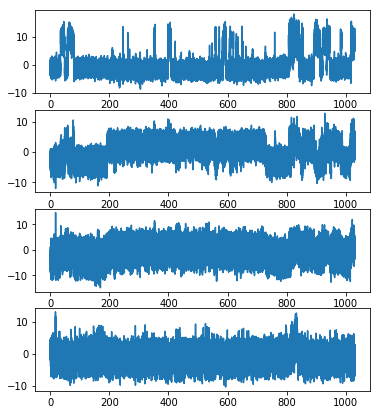

In [4]:
# DE SHAW DATA

f = Fasu('../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca_1ms_dt10ns.xtc',
         top='../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb')#,selection='name CA') #note that analysis fails when use selection='name CA'
c = Cofasu(f)

print c.shape # This should give 103125 snapshots, each of 58 atoms, each with three (x,y,z) coordinates
p = pca.fromtrajectory(c)

DE_plot = 1

if DE_plot == 1:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[0:-1]],p.projs[3][dermsd_index_list[0:-1]], 'bo')
 
    
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(p.projs[0][:80000],p.projs[3][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # note sure why these plots come out flipped right to left compared to plots prof Laughton supplied 
    
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[0:-1]],p.projs[3][dermsd_index_list[0:-1]], 'bo')

    
    # In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
    plt.figure(figsize=(6, 7))
    time = np.arange(len(c)) / 100.0
    plt.subplot(4,1,1)
    plt.plot(time, p.projs[0])
    plt.subplot(4,1,2)
    plt.plot(time, p.projs[1])
    plt.subplot(4,1,3)
    plt.plot(time, p.projs[2])
    plt.subplot(4,1,4)
    plt.plot(time, p.projs[3])
    

In [5]:
#######################################################################

#######################################################################

# USER INPUTS

#dirname = "p07e01_k12_00010_k34_00100"

dirname = "p07e01_k12_00100_k34_01000_mdtx2"
doCoFasu = 0
doRmsd=0

reqe =6






# no need to touch
cu = 20 
iters = 20
cores = 200
top = '../bpti/old_gits/test_git_dev/gmxcoco-bpti/inp_files/bpti.gro'
atm = '/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/'

folder = dirname+"/"

path_to_zip = glob.glob(atm+folder+'zip.rp*-pilot.0000')
#print path_to_zip
#print type(path_to_zip)
#print path_to_zip[0].split("/")[-1]
#print path_to_zip[0].split("/")[-1].split("-pilot.0000")

rpname = str(path_to_zip[0].split("/")[-1].split("-pilot.0000")[0])
zipfolder = rpname+ '-pilot.0000/'
prj = folder + zipfolder
path   = atm+prj
pathSt = atm+prj+"staging"
pathCu = atm+prj+"cu009"
#print path


#print " "
#print "path to cu"
path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
#print path_to_cu
#print len(path_to_cu)

iters = int(len(path_to_cu))+2
print 'iters =', iters

iters = 20


In [6]:
##############################################################################################
# Automated grab data from dir - START
##############################################################################################

In [7]:
# get details from gmxcoco.wcfg
print "#########################################"
print  "#              gmxcoco.wcfg details        #"
print  "########################################"

wsplit = []
path_to_gmxcoco=atm+folder+"/gmxcoco.wcfg"    
e=open(path_to_gmxcoco,"r")
#print e.readlines()
w = e.readlines()
e.close()
#for i in range(len(w)):
    #print i
    #print w[i]
gmxcocolines = [5, 7, 12, 28, 31  ]
for i in range(len(gmxcocolines)):
    print w[gmxcocolines[i]]
    #print w[gmxcocolines[i]].split()
    wsplit.append(w[gmxcocolines[i]].split())
    
    
#print wsplit[0][2]
#print wsplit[1][2]


#iters = int(wsplit[0][2])
#print iters
cu = int(wsplit[1][2])

#########################################
#              gmxcoco.wcfg details        #
########################################
num_iterations 	= 20                # Number of iterations of Simulation-Analysis

num_CUs   	= 20                # Number of tasks or Compute Units

num_cores_per_sim_cu = 20      # set from 24 to 20 for supermic  Number of cores per Simulation Compute Unit

grompp_1_itp_file    = './inp_files/posre_ca_100.itp'  # Entire path to ITP file

grompp_2_itp_file    = './inp_files/posre_ca_1000.itp' # Entire path to ITP file



In [8]:
print "#########################################"
print  "#              run1.mdp details        #"
print  "########################################"
    
##### read RUN1.mdp ######
path_to_run1=atm+folder+ "inp_files/"+"run1.mdp"    
e=open(path_to_run1,"r")
#print e.readlines()
w = e.readlines()
e.close()
#for i in range(len(w)):
    #print i
    #print w[i]
#lines = [9] #, 7, 12, 28, 31  ]
print w[4]
print w[9]
print w[10]

run1 = []
run1.append(w[9].split())
run1.append(w[10].split())
#print run1[0]
#print run1[1]
eqibTimePerIter = float(run1[0][2])*float(run1[1][2])
print 'total equilibrum time =', float(run1[0][2])*float(run1[1][2])

#########################################
#              run1.mdp details        #
########################################
define          = -DPOSRES_CA_100

emstep          = 0.01

nsteps          = 1000

total equilibrum time = 10.0


In [9]:

print "#########################################"
print  "#              run2.mdp details        #"
print  "########################################"

##### read RUN2.mdp ######
path_to_run2=atm+folder+ "inp_files/"+"run2.mdp"    
e=open(path_to_run2,"r")
#print e.readlines()
w = e.readlines()
e.close()
#for i in range(len(w)):
    #print i
    #print w[i]
lines = [9, 10, 15, 16] # 7, 12, 28, 31  ]
for i in range(len(lines)):
    print w[lines[i]]

run2 = []
run2.append(w[9].split())
#run2.append(w[10].split())
run2.append(w[15].split())
run2.append(w[16].split())
#print run2[0]
#print run2[1]
#print run2[2]
restMDPerIter = float(run2[1][2])*float(run2[2][2])
print 'total restrained MD time is =', float(run2[1][2])*float(run2[2][2])

#########################################
#              run2.mdp details        #
########################################
define                   = -DPOSRES_CA_1000



dt                       = 0.002

nsteps                   = 5000

total restrained MD time is = 10.0


In [10]:
print "#########################################"
print  "#              run3.mdp details        #"
print  "########################################"


##### read RUN3.mdp ######
path_to_run3=atm+folder+ "inp_files/"+"run3.mdp"    
e=open(path_to_run3,"r")
#print e.readlines()
w = e.readlines()
e.close()
#for i in range(len(w)):
    #print i
    #print w[i]
lines = [ 16, 17 ] # 7, 12, 28, 31  ]
for i in range(len(lines)):
    print w[lines[i]]

run3 = []
#run3.append(w[9].split())
#run2.append(w[10].split())
run3.append(w[16].split())
run3.append(w[17].split())
#print run3[0]
#print run3[1]
#print run3[2]
mdTimePerIter = float(run3[0][2])*float(run3[1][2]) 
print 'total unrestrained MD time is =', float(run3[0][2])*float(run3[1][2])

#########################################
#              run3.mdp details        #
########################################
dt                       = 0.002

nsteps                   = 100000

total unrestrained MD time is = 200.0


In [11]:
### total aggregated simulation time 
total_eqb_sim = iters*cu*eqibTimePerIter
print "total_eqb_sim = ", total_eqb_sim, " picosec" 
print " "
total_restMD_sim = iters*cu*restMDPerIter
print "total_restMD_sim = ", total_restMD_sim, " picosec" 
print " "
total_unrestMD_sim = iters*cu*mdTimePerIter
print "total_unrestMD_sim = ", total_unrestMD_sim, " picosec" 
print " "
total_time_simd = total_eqb_sim + total_restMD_sim + total_unrestMD_sim
print "total_time_simd = ", total_time_simd, " picosec" 



total_eqb_sim =  4000.0  picosec
 
total_restMD_sim =  4000.0  picosec
 
total_unrestMD_sim =  80000.0  picosec
 
total_time_simd =  88000.0  picosec


In [12]:
################ summary of simulated time by kernels ###############

In [13]:
###############################################################################################
# Automated grab data from dir - END
###############################################################################################



In [14]:
###############################################################################################
# FASU AND COFASU - START 
###############################################################################################

def run_fasu_tot(l,path,top,cu,iters,fileprefix,fileExt,offset=0):
    offset=0
    for i in range(0,iters):
        for k in range(cu):                
            string = path+"/"+fileprefix+"-"+str(i)+"_"+str(k)+fileExt
            ss = path+"/"
            if(fileprefix=="coco_out"):
                string = path+"/"+fileprefix+"_"+str(i)+"_"+str(k)+fileExt
            #str_list[i][k] = string
            #print string
            if(os.path.isfile(string)==True):
                #print string
                l[i][k] = Fasu(string,top=top, selection='name CA')
    return l;

def cofasu_flex_tot(cByIters,l,offset=0):
    l_row = []

    for i in range(0,len(l)): #[4, 9, 14, 19]
        
        for j in range(len(l[i])):
            l_row.append(l[i][j])
        #print l_row
    cByIters[i] = Cofasu(l_row)
        
    return cByIters;

def plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list=0, offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    for i in range(iters-1,iters):
        #print "i is =",i
        p14i4 = []
        p14i4T = []
        for j in range(len(cByIters[i])):
            #print "j is =", j
            p14i4.append(p.map(cByIters[i][j])[[0,3]])
        p14i4T = np.array(p14i4).T
        pByIters.append(p14i4T) 
    fig = plt.figure(figsize=(9,4))
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'k.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(pByIters[i][0] , pByIters[i][1] , 'b.')
        
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'r^') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'ro')
    
    if rmsd_index_list!=0:
        #plot the 5 traj states that are closest to DE Shaw 5 most visted states
        plt.plot(pByIters[0][0][rmsd_index_list[:]],pByIters[0][1][rmsd_index_list[:]], 'wo')

    return pByIters;

def save_object_prefix(obj, atm, dirname,fileprefix):
    filename = dirname+"_"+fileprefix+".pkl"
    with open(atm+dirname+"/"+filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

def load_object_prefix( atm, dirname, fileprefix):
    filename = dirname+"_"+fileprefix+".pkl"
    with open(atm+dirname+"/"+filename, 'rb') as datainput:
        k = pickle.load(datainput)
        return k;        
        

In [15]:
# check if need to DoCoFasu

print " check for DoCoFasu"
print " "
fileExt = '.xtc'
fileprefix = 'md'
filename = dirname+"_"+fileprefix+".pkl"
checkForCoFasu = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForCoFasu==[]:
    doCoFasu=1
else:
    print filename, " exists"

fileExt = '.gro'
fileprefix = 'coco_out'
filename = dirname+"_"+fileprefix+".pkl"
checkForCoFasu = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForCoFasu==[]:
    doCoFasu=1
else:
    print filename, " exists"

fileExt = '.gro'
fileprefix = 'eq'
filename = dirname+"_"+fileprefix+".pkl"
checkForCoFasu = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForCoFasu==[]:
    doCoFasu=1
else:
    print filename, " exists"
    

print " "




#################################################################
# FASU AND COFASU OPERATIONS ARE DONE HERE
# RESULTS ARE SAVED TO FILES USING SAVE OBJECT TO AVOID RE RUNNING ON IPYNB RESTART
# SET doCoFasu==0 if COFASU results already exist for the dir of interest
#################################################################


if doCoFasu==1:
    l = np.empty((iters,cu),dtype=object) 
    offset=0

# COLLECT FASU and COFASU DATA
# same thing that Prof. Laughton did in his example analysis files from the github just I had to make
# minor changes for the different settings and made a function so it was easier to automate analysis 

# Fasu and Cofasu of the md-[0-iters]_[0-cu].xtc files - so can compare data in PCA space vs DE Shaw data
    fileExt = '.xtc'
    fileprefix = 'md'
    run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
    cByIters = [[0 for i in range(cu)] for j in range(iters)]
    cofasu_flex_tot(cByIters,l,offset);
    filename = dirname+"_"+fileprefix+".pkl"
    save_object(cByIters,filename,atm,folder)
# Fasu and Cofasu of the coco_out_[0-iters]_[0-cu].gro files 
# so we can see where coco generated strucutres fall in the PCA space compared to the 
# final results of the full workflows, md-[0-iters]_[0-cu].xtc
# This will let us see how far the bpti.gro strucutre is "pulled" towards the coco generated strucutures
    fileExt = '.gro'
    fileprefix = 'coco_out'
    run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
    coco_cByIters = [[0 for i in range(cu)] for j in range(iters)]
    cofasu_flex_tot(coco_cByIters,l,offset);
    filename = dirname+"_"+fileprefix+".pkl"
    save_object(coco_cByIters,filename,atm,folder)
# # Fasu and Cofasu of the eq-[0-iters]_[0-cu].gro files ( the output files of kernel 4 )
# Since this is the output of K4 it is the end of the "pull bpti.gro towards coco structure"
# part of the code. Should let us evaluate how effective using stronger spring constants
# or longer times, to pull bpti.gro towards the coco strucutres 
    fileExt = '.gro'
    fileprefix = 'eq'
    run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
    eq_cByIters = [[0 for i in range(cu)] for j in range(iters)]
    cofasu_flex_tot(eq_cByIters,l,offset);
    filename = dirname+"_"+fileprefix+".pkl"
    save_object(eq_cByIters,filename,atm,folder)
else:
# COLLECT FASU and COFASU DATA
# same thing that Prof. Laughton did in his example analysis files from the github just I had to make
# minor changes for the different settings and made a function so it was easier to automate analysis 

# Fasu and Cofasu of the md-[0-iters]_[0-cu].xtc files - so can compare data in PCA space vs DE Shaw data
    fileExt = '.xtc'
    fileprefix = 'md'
    #cByIters = [[0 for i in range(cu)] for j in range(iters)]
    filename = dirname+"_"+fileprefix+".pkl"
    cByIters = load_object(filename,atm,folder)
# Fasu and Cofasu of the coco_out_[0-iters]_[0-cu].gro files 
# so we can see where coco generated strucutres fall in the PCA space compared to the 
# final results of the full workflows, md-[0-iters]_[0-cu].xtc
# This will let us see how far the bpti.gro strucutre is "pulled" towards the coco generated strucutures
    fileExt = '.gro'
    fileprefix = 'coco_out'
    #coco_cByIters = [[0 for i in range(cu)] for j in range(iters)]
    filename = dirname+"_"+fileprefix+".pkl"
    coco_cByIters = load_object(filename,atm,folder)
# # Fasu and Cofasu of the eq-[0-iters]_[0-cu].gro files ( the output files of kernel 4 )
# Since this is the output of K4 it is the end of the "pull bpti.gro towards coco structure"
# part of the code. Should let us evaluate how effective using stronger spring constants
# or longer times, to pull bpti.gro towards the coco strucutres 
    fileExt = '.gro'
    fileprefix = 'eq'
    #eq_cByIters = [[0 for i in range(cu)] for j in range(iters)]
    filename = dirname+"_"+fileprefix+".pkl"
    eq_cByIters = load_object(filename,atm,folder)

 check for DoCoFasu
 
p07e01_k12_00100_k34_01000_mdtx2_md.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_coco_out.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_eq.pkl  exists
 
p07e01_k12_00100_k34_01000_mdtx2_md.pkl  is now loaded
p07e01_k12_00100_k34_01000_mdtx2_coco_out.pkl  is now loaded
p07e01_k12_00100_k34_01000_mdtx2_eq.pkl  is now loaded


In [16]:
# check if need DoRmsd

print "check for DoRmsd"
print " "
filename = dirname+"_"+'rmsd_index_list.pkl'
checkForDoRmsd = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForDoRmsd==[]:
    doRmsd=1
else:
    print filename, " exists"

filename = dirname+"_"+'rmsd_values_list.pkl'
checkForDoRmsd = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForDoRmsd==[]:
    doRmsd=1
else:
    print filename, " exists" 
    
filename = dirname+"_"+'rmsd_data_list.pkl'
checkForDoRmsd = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForDoRmsd==[]:
    doRmsd=1
else:
    print filename, " exists" 


####################################################
# do RMSD calculations wtih 5 DE shaw PDB files    #
####################################################


deshaw_pdb_workingdir = '/home/feb23/Documents/jha/extasy/bpti/protein_pdb'

rmsd_index_list = []
rmsd_values_list = []
rmsd_data_list = []

if doRmsd==1:
    for i in range(1,6):
        pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
        pdbload = deshaw_pdb_workingdir +'/'+pdb
        #pdbload = '../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb'
        pdb_obj = md.load(pdbload, top)
        print type(pdb_obj)
        po_fasu = Fasu(pdb_obj)
        print type(po_fasu)
        po_cofasu = Cofasu(po_fasu)
        print type(po_cofasu)
        print po_cofasu.shape
        print c.shape
        target_structure = po_cofasu[0]
        rmsds = fastfitting.rmsd_traj(cByIters[iters-1], target_structure)
        print pdb
        print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())
        rmsd_index_list.append(np.argmin(rmsds))
        rmsd_values_list.append(rmsds.min())
        rmsd_data_list.append(rmsds)
    

    # save results for loading later ( takes about 11 min to run on laptop)
    filename = dirname+"_"+'rmsd_index_list.pkl'
    save_object(rmsd_index_list,filename,atm,folder)

    filename = dirname+"_"+'rmsd_values_list.pkl'
    save_object(rmsd_values_list,filename,atm,folder)

    filename = dirname+"_"+'rmsd_data_list.pkl'
    save_object(rmsd_data_list,filename,atm,folder)

else:
    
    # load results for use in other places later on 
    filename = dirname+"_"+'rmsd_index_list.pkl'
    rmsd_index_list = load_object(filename,atm,folder)

    filename = dirname+"_"+'rmsd_values_list.pkl'
    rmsd_values_list = load_object(filename,atm,folder)

    filename = dirname+"_"+'rmsd_data_list.pkl'
    rmsd_data_list = load_object(filename,atm,folder) 
    
    
for i in range(1,6):
    pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
    print " "
    print pdb
    print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(rmsd_index_list[i-1], rmsd_values_list[i-1])


check for DoRmsd
 
p07e01_k12_00100_k34_01000_mdtx2_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_mdtx2_rmsd_values_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_mdtx2_rmsd_data_list.pkl  is now loaded
 
CA_1187409s_pdb1.pdb
The closest match to the target was snapshot 2806 with rmsd 0.83 angstroms
 
CA_1187409s_pdb2.pdb
The closest match to the target was snapshot 2641 with rmsd 1.52 angstroms
 
CA_1187409s_pdb3.pdb
The closest match to the target was snapshot 5216 with rmsd 2.17 angstroms
 
CA_1187409s_pdb4.pdb
The closest match to the target was snapshot 3270 with rmsd 1.18 angstroms
 
CA_1187409s_pdb5.pdb
The closest match to the target was snapshot 5660 with rmsd 0.84 angstroms


In [17]:
# check if need c2me_DoRmsd
c2me_doRmsd=0

print "check for c2me_DoRmsd"
print " "
filename = dirname+"_"+'c2me_rmsd_index_list.pkl'
checkForDoRmsd = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForDoRmsd==[]:
    c2me_doRmsd=1
else:
    print filename, " exists"

filename = dirname+"_"+'c2me_rmsd_values_list.pkl'
checkForDoRmsd = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForDoRmsd==[]:
    c2me_doRmsd=1
else:
    print filename, " exists" 
    
filename = dirname+"_"+'c2me_rmsd_data_list.pkl'
checkForDoRmsd = glob.glob(atm+folder+filename)
#print checkForCoFasu
if checkForDoRmsd==[]:
    c2me_doRmsd=1
else:
    print filename, " exists" 


####################################################
# do RMSD calculations wtih 5 DE shaw PDB files     #
####################################################


c2me_rmsd_index_list = []
c2me_rmsd_values_list = []
c2me_rmsd_data_list = []

if c2me_doRmsd==1:
    for i in range(1,6):
        #pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
        #pdbload = deshaw_pdb_workingdir +'/'+pdb
        #pdbload = '../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb'
        #pdb_obj = md.load(pdbload, top)
        #print type(pdb_obj)
        #po_fasu = Fasu(pdb_obj)
        #print type(po_fasu)
        #po_cofasu = Cofasu(po_fasu)
        #print type(po_cofasu)
        #print po_cofasu.shape
        #print c.shape
        target_structure = c[dermsd_index_list[i-1]]
        rmsds = fastfitting.rmsd_traj(cByIters[iters-1], target_structure)
        #print "c index = ",dermsd_index_list[i-1], " c rmsd = ", dermsd_values_list[i-1] 
        #print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())
        c2me_rmsd_index_list.append(np.argmin(rmsds))
        c2me_rmsd_values_list.append(rmsds.min())
        c2me_rmsd_data_list.append(rmsds)
    
    # save results for loading later ( takes about 11 min to run on laptop)
    filename = dirname+"_"+'c2me_rmsd_index_list.pkl'
    save_object(c2me_rmsd_index_list,filename,atm,folder)

    filename = dirname+"_"+'c2me_rmsd_values_list.pkl'
    save_object(c2me_rmsd_values_list,filename,atm,folder)

    filename = dirname+"_"+'c2me_rmsd_data_list.pkl'
    save_object(c2me_rmsd_data_list,filename,atm,folder)

else:
    
    # load results for use in other places later on 
    filename = dirname+"_"+'c2me_rmsd_index_list.pkl'
    c2me_rmsd_index_list = load_object(filename,atm,folder)

    filename = dirname+"_"+'c2me_rmsd_values_list.pkl'
    c2me_rmsd_values_list = load_object(filename,atm,folder)

    filename = dirname+"_"+'c2me_rmsd_data_list.pkl'
    c2me_rmsd_data_list = load_object(filename,atm,folder) 
    
print len(c2me_rmsd_index_list) 
print len( c2me_rmsd_values_list)
print "for loop here"
for i in range(1,6):
    pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
    print " "

    print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(c2me_rmsd_index_list[i-1], c2me_rmsd_values_list[i-1])


print rmsd_index_list
print c2me_rmsd_index_list

check for c2me_DoRmsd
 
5
5
for loop here
 
The closest match to the target was snapshot 6865 with rmsd 0.72 angstroms
 
The closest match to the target was snapshot 2641 with rmsd 1.43 angstroms
 
The closest match to the target was snapshot 2628 with rmsd 2.10 angstroms
 
The closest match to the target was snapshot 3270 with rmsd 1.17 angstroms
 
The closest match to the target was snapshot 5660 with rmsd 0.84 angstroms
[2806, 2641, 5216, 3270, 5660]
[6865, 2641, 2628, 3270, 5660]


In [18]:
print rmsd_index_list

[2806, 2641, 5216, 3270, 5660]


(8400, 58, 3)


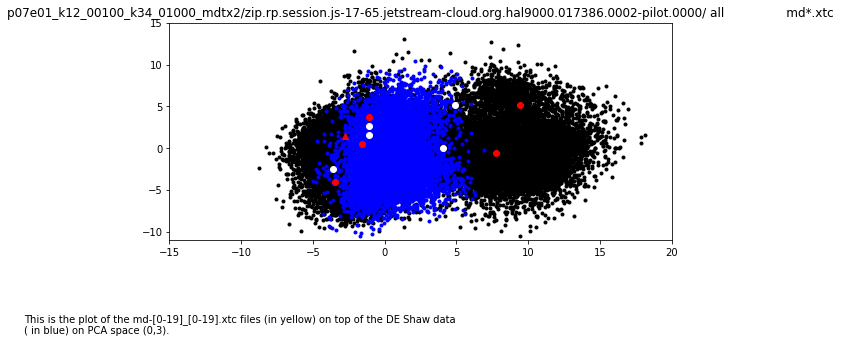

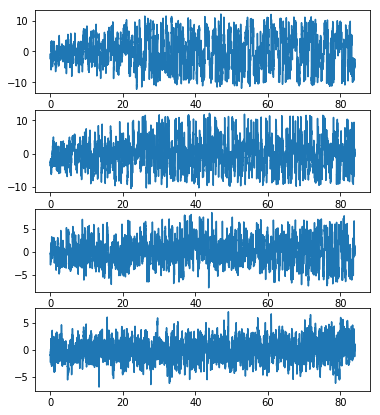

In [19]:
#PLOTTING DATA IN PCA SPACE

print cByIters[iters-1].shape
fileExt = '.xtc'
fileprefix = 'md'
cap ='''
This is the plot of the md-[0-19]_[0-19].xtc files (in yellow) on top of the DE Shaw data
( in blue) on PCA space (0,3). '''

pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list)

# In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
plt.figure(figsize=(6, 7))
c_plot_time = np.arange(len(cByIters[iters-1]))/100.0  # need to use output freq and time units size to convert
                                           # to the same time scale as DE Shaw data. 
# our data 
xtc_p = pca.fromtrajectory(cByIters[iters-1],req_evecs=reqe)
plt.subplot(4,1,1)
plt.plot(c_plot_time, xtc_p.projs[0])
plt.subplot(4,1,2)
plt.plot(c_plot_time, xtc_p.projs[1])
plt.subplot(4,1,3)
plt.plot(c_plot_time, xtc_p.projs[2])
plt.subplot(4,1,4)
plt.plot(c_plot_time, xtc_p.projs[3])

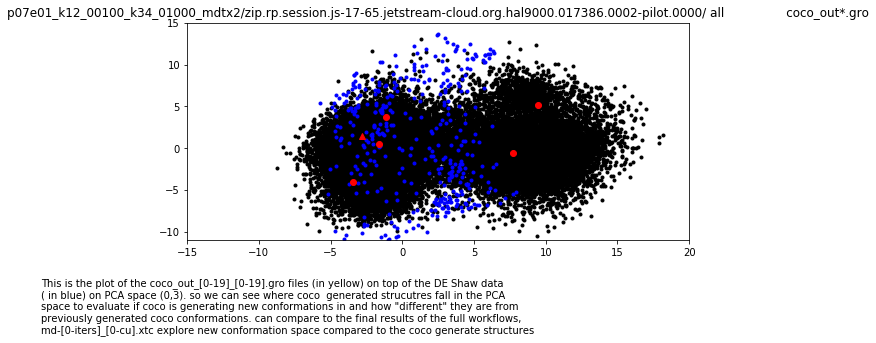

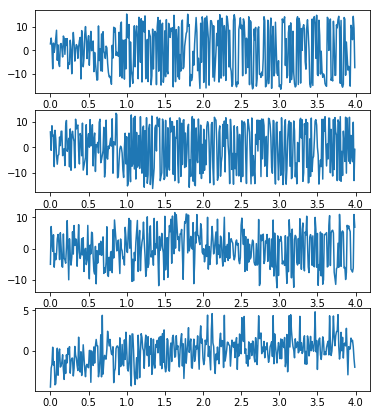

In [20]:
fileExt = '.gro'
fileprefix = 'coco_out'
cap ='''
This is the plot of the coco_out_[0-19]_[0-19].gro files (in yellow) on top of the DE Shaw data 
( in blue) on PCA space (0,3). so we can see where coco  generated strucutres fall in the PCA 
space to evaluate if coco is generating new conformations in and how "different" they are from
previously generated coco conformations. can compare to the final results of the full workflows,
md-[0-iters]_[0-cu].xtc explore new conformation space compared to the coco generate structures'''
coco_pByIters = plot_cofasu_tot(p,coco_cByIters,iters,prj,fileprefix,fileExt,dermsd_index_list,  cap)

# In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
plt.figure(figsize=(6, 7))
c_plot_time = np.arange(len(coco_cByIters[iters-1]))/100.0  # need to use output freq and time units size to convert
                                           # to the same time scale as DE Shaw data. 
# our data 
coco_p = pca.fromtrajectory(coco_cByIters[iters-1],req_evecs=reqe)
plt.subplot(4,1,1)
plt.plot(c_plot_time, coco_p.projs[0])
plt.subplot(4,1,2)
plt.plot(c_plot_time, coco_p.projs[1])
plt.subplot(4,1,3)
plt.plot(c_plot_time, coco_p.projs[2])
plt.subplot(4,1,4)
plt.plot(c_plot_time, coco_p.projs[3])

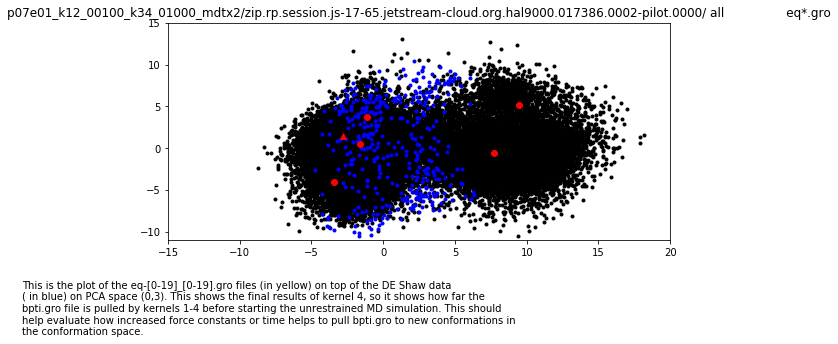

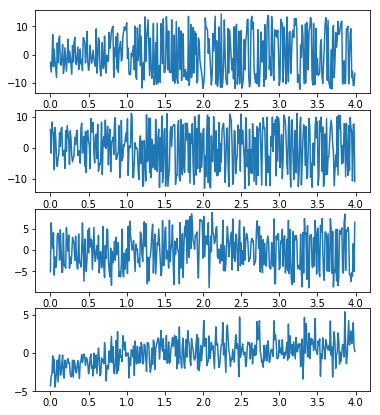

In [21]:
fileExt = '.gro'
fileprefix = 'eq'
cap = '''This is the plot of the eq-[0-19]_[0-19].gro files (in yellow) on top of the DE Shaw data 
( in blue) on PCA space (0,3). This shows the final results of kernel 4, so it shows how far the 
bpti.gro file is pulled by kernels 1-4 before starting the unrestrained MD simulation. This should
help evaluate how increased force constants or time helps to pull bpti.gro to new conformations in 
the conformation space.'''

eq_pByIters = plot_cofasu_tot(p,eq_cByIters,iters,prj,fileprefix,fileExt, dermsd_index_list, cap)

# In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
plt.figure(figsize=(6, 7))
c_plot_time = np.arange(len(eq_cByIters[iters-1]))/100.0  # need to use output freq and time units size to convert
                                           # to the same time scale as DE Shaw data. 
# our data 
eq_p = pca.fromtrajectory(eq_cByIters[iters-1],req_evecs=reqe)
plt.subplot(4,1,1)
plt.plot(c_plot_time, eq_p.projs[0])
plt.subplot(4,1,2)
plt.plot(c_plot_time, eq_p.projs[1])
plt.subplot(4,1,3)
plt.plot(c_plot_time, eq_p.projs[2])
plt.subplot(4,1,4)
plt.plot(c_plot_time, eq_p.projs[3])

/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


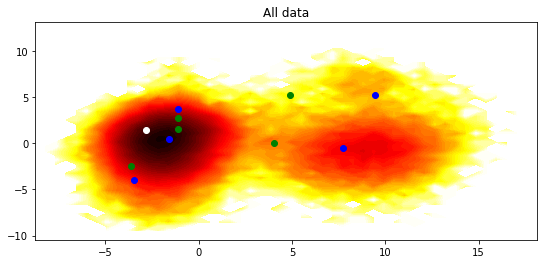

In [22]:
# lowest RMSD of our data vs deshaw PDB files of 5 most sampled structures

DE_plot2 = 1

if DE_plot2 == 1:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
    plt.figure(figsize=(9, 4))
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')
    sx=1.0
    sy=1.0
    #plot the 5 traj states that are closest to DE Shaw 5 most visted states
    plt.plot(sx*pByIters[0][0][rmsd_index_list[:]],sy*pByIters[0][1][rmsd_index_list[:]], 'go')
    #for i in range(len(rmsd_index_list)):
            #plt.plot(pByIters[0][0][rmsd_index_list[i]],pByIters[1][3][rmsd_index_list[i]], 'go')


/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


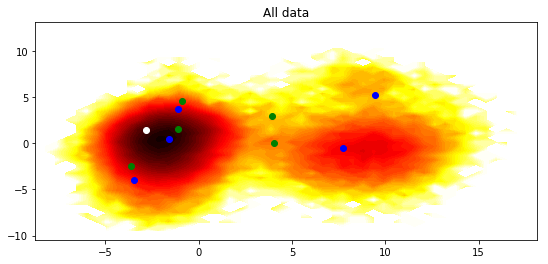

In [23]:
# lowest RMSD of our data vs deshaw trajectory data
# c2me_rmsd 

DE_plot2 = 1

if DE_plot2 == 1:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
    plt.figure(figsize=(9, 4))
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')
    sx=1.0
    sy=1.0
    #plot the 5 traj states that are closest to DE Shaw 5 most visted states
    plt.plot(sx*pByIters[0][0][c2me_rmsd_index_list[:]],sy*pByIters[0][1][c2me_rmsd_index_list[:]], 'go')
    #for i in range(len(rmsd_index_list)):
            #plt.plot(pByIters[0][0][rmsd_index_list[i]],pByIters[1][3][rmsd_index_list[i]], 'go')


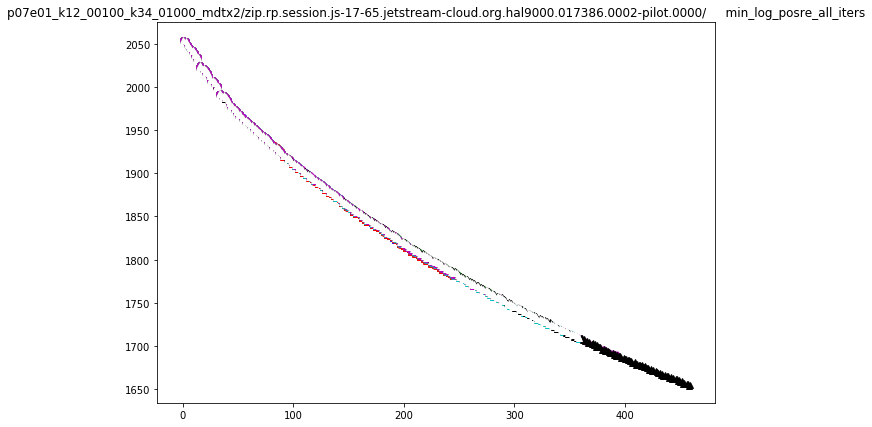

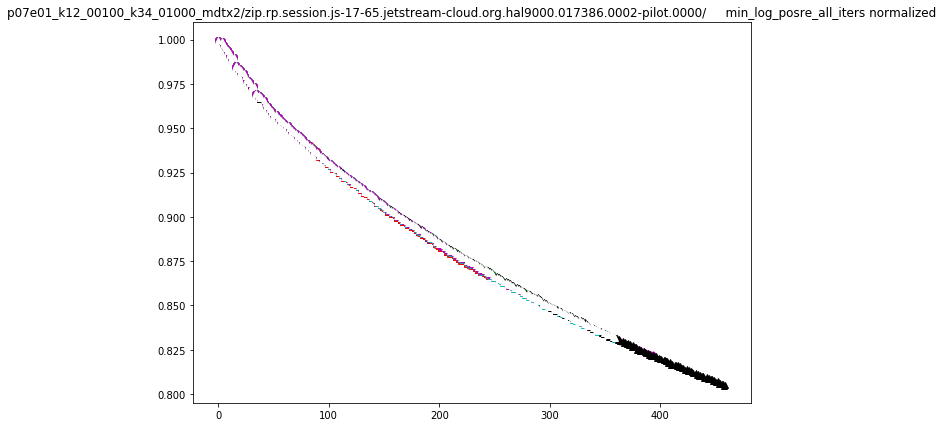

In [24]:
#################### analysis of min*.log                   #####################
# Position restraint energy vs time data 
#################################################################################

#################### min analysis function                ########################

def min_log_posre_all_iters(N,iters,pathCu,prj,normal='raw'):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="min-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[358].split()
        z=w[362].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q and w[i+3].split()==z):

                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        N.append(m)
        
    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 200))
    if normal=='normalize':
        plt.title(prj+"     "+"min_log_posre_all_iters"+ " "+'normalized')
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(N)):
            for i in range(len(N[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(N[lm][i][0]),float(N[lm][i][11])/float(N[lm][0][11]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    else:
        plt.title(prj+"     "+"min_log_posre_all_iters")
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(N)):
            for i in range(len(N[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(N[lm][i][0]),float(N[lm][i][11]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return N;



#################### analysis of min*.log                   #####################
# Position restraint energy vs time data 
#################################################################################


# plots of position restrain energy change over time for K1/K2 
# uses min-[0-19]_9.log for plotting. 
N=[]
# plots raw pos res energy 
# x axis is time steps and y axis is KJ/mol
min_log_posre_all_iters(N,iters,pathCu,prj);
N=[]
# plots pos res energy normalized by the pos res energy at step=0
# x axis is time steps and y axis is KJ/mol
min_log_posre_all_iters(N,iters,pathCu,prj,'normalize');

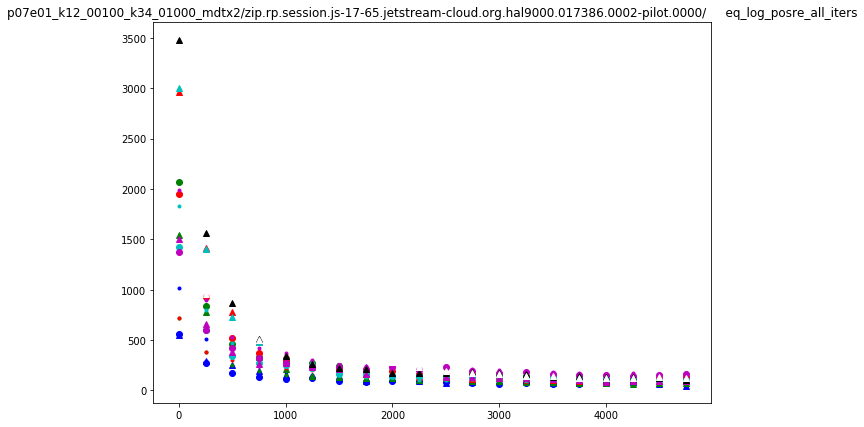

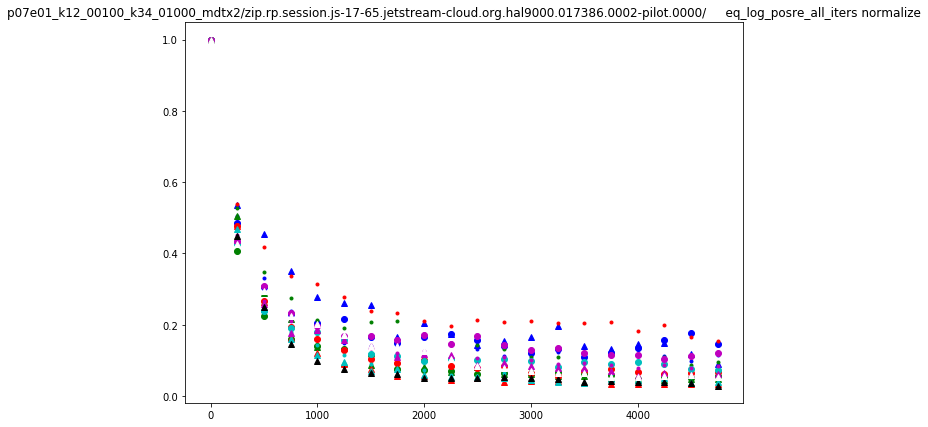

In [25]:
#################### analysis of eq*.log                   #####################
# Position restraint energy vs time data 
#################################################################################

#################### eq analysis function                ########################

def eq_log_posre_all_iters(M,iters,pathCu,prj,normal='raw'):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="eq-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[399].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q):
                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        M.append(m)


    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 2))
    if normal=='normalize':
        plt.title(prj+"     "+"eq_log_posre_all_iters"+" "+'normalize')
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(M)):
            for i in range(len(M[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(M[lm][i][0]),float(M[lm][i][11])/float(M[lm][0][11]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    else:
        plt.title(prj+"     "+"eq_log_posre_all_iters")
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(M)):
            for i in range(len(M[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return M;



#################### eq analysis               ########################


# plots of position restrain energy change over time for K3/K4 
# uses eq-[0-19]_9.log for plotting. 
M = []
# plots raw pos res energy 
# x axis is time steps and y axis is KJ/mol
eq_log_posre_all_iters(M,iters,pathCu,prj);
M = []
# plots pos res energy normalized by the pos res energy at step=0
# # x axis is time steps and y axis is KJ/mol
eq_log_posre_all_iters(M,iters,pathCu,prj,'normalize');

In [26]:
############################################################################################
# EIGAN VALUE AND VECTOR ANALYSIS SECTION STARTS HERE ######################################
############################################################################################

In [27]:
#PCA EVALS - GIVES IMPORTANCE OF axis for variance



class prettyfloat(float):
    def __repr__(self):
        return "%.3f" % self

#nice = map(prettyfloat,kavgsnorm)
#print nice



print "DE shaw p.evals"
de_p = pca.fromtrajectory(c,req_evecs=reqe)
print cByIters[iters-1].shape
print map(prettyfloat,de_p.evals) 
print " "


#print "****************"
#print "our data pp.evals"
#print "****************"

print "cByIters - PCA results for md-[0-19]_[0-19].xtc files "
print cByIters[iters-1].shape
print map(prettyfloat,xtc_p.evals)
print " "

print "coco_cByIters - PCA results for coco_out_[0-19]_[0-19].gro files"
print coco_cByIters[iters-1].shape
print map(prettyfloat,coco_p.evals)
print " "

print "eq_cByIters - PCA results for eq-[0-19]_[0-19].gro files"
print eq_cByIters[iters-1].shape
print map(prettyfloat,eq_p.evals)
print " "


# goal of this section is to just show how variance is captured by PCA in DE Shaw data 
# and our data. For use the first 5 PCA axis are the most important. Wanted to see 
# if variance was different in the three files and how they compare to variance in 
# the DE Shaw data. 

DE shaw p.evals
(8400, 58, 3)
[17.040, 10.252, 10.172, 4.824, 3.772, 2.909]
 
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(8400, 58, 3)
[22.436, 14.374, 6.162, 3.340, 2.225, 1.811]
 
coco_cByIters - PCA results for coco_out_[0-19]_[0-19].gro files
(400, 58, 3)
[104.829, 77.805, 32.600, 3.058, 2.561, 1.914]
 
eq_cByIters - PCA results for eq-[0-19]_[0-19].gro files
(400, 58, 3)
[61.031, 51.303, 18.822, 2.992, 2.249, 1.669]
 


In [28]:
############################################################################
# Eigan vector dot product matrix
############################################################################

eigMatDot = []


for i in range(len(de_p.evecs)):
    eigMatDot.append([i])
    for j in range(len(xtc_p.evecs)):
        cow = np.dot(de_p.evecs[i],xtc_p.evecs[j])
        eigMatDot[i].append(cow)


print " our eig along rows"
print " shaw eig along cols"
print " "
for i in range(len(eigMatDot)):
    print map(prettyfloat,eigMatDot[i][1:])


 our eig along rows
 shaw eig along cols
 
[-0.126, 0.205, 0.171, 0.049, 0.081, 0.007]
[0.228, -0.357, -0.121, 0.213, -0.008, -0.100]
[-0.335, 0.312, 0.208, -0.077, 0.032, 0.471]
[0.102, -0.550, 0.009, -0.007, -0.209, 0.321]
[0.084, -0.190, 0.015, 0.075, -0.255, 0.136]
[-0.235, 0.047, -0.278, 0.031, 0.037, 0.045]


In [29]:
# RMSIP - test
# Doing RMSIP calc with np.dot(de_p.evecs.de_p.evecs) should give 1.0 or at least very close to zero

#print len(xtc_p.evals)
#print len(de_p.evals)

#print xtc_p.evals
#print de_p.evals

print len(xtc_p.evecs)
print len(de_p.evecs)

#print xtc_p.evecs
#print de_p.evecs


RMSIP = 0
for i in range(len(de_p.evecs)):
    for j in range(len(de_p.evecs)):
        cow = np.dot(de_p.evecs[i],de_p.evecs[j])**2
        #print "i =", i, "j =", j, cow**(0.5)

        RMSIP = RMSIP + cow
        
RMSIP = (RMSIP/reqe)**(1.0/2.0)
print "RMSIP = ", RMSIP

6
6
RMSIP =  1.0


In [30]:
# RMSIP de_shaw vecs w/ or vecs #

reqe = 6

de_p = pca.fromtrajectory(c,req_evecs=reqe)
xtc_p = pca.fromtrajectory(cByIters[iters-1],req_evecs=reqe)


print len(de_p.evecs)

RMSIP = 0
for i in range(len(de_p.evecs)):
    for j in range(len(xtc_p.evecs)):
        cow = np.inner(de_p.evecs[i],xtc_p.evecs[j])**2
        print "i =", i, "j =", j, "   ", cow**(0.5)
        RMSIP = RMSIP + cow
RMSIP = (RMSIP/reqe)**(1.0/2.0)
print "RMSIP = ", RMSIP

6
i = 0 j = 0     0.126096711463
i = 0 j = 1     0.205411238144
i = 0 j = 2     0.171268169891
i = 0 j = 3     0.0490957672795
i = 0 j = 4     0.0808401977701
i = 0 j = 5     0.00654286726098
i = 1 j = 0     0.227897485042
i = 1 j = 1     0.357444239101
i = 1 j = 2     0.121408508533
i = 1 j = 3     0.213394325868
i = 1 j = 4     0.00835737280949
i = 1 j = 5     0.0996460104147
i = 2 j = 0     0.334704971909
i = 2 j = 1     0.311699779961
i = 2 j = 2     0.208170008046
i = 2 j = 3     0.0767683276045
i = 2 j = 4     0.0322064072462
i = 2 j = 5     0.470624307058
i = 3 j = 0     0.10236481605
i = 3 j = 1     0.549680056814
i = 3 j = 2     0.00940045161039
i = 3 j = 3     0.00686922183462
i = 3 j = 4     0.209469026221
i = 3 j = 5     0.321159531186
i = 4 j = 0     0.0838569580226
i = 4 j = 1     0.189699454311
i = 4 j = 2     0.0153246199802
i = 4 j = 3     0.0753259638667
i = 4 j = 4     0.254794979496
i = 4 j = 5     0.136104276302
i = 5 j = 0     0.235287904491
i = 5 j = 1     0.0472

In [31]:
##################### PERFORMANCE ANALYSIS STARTS HERE ######################

In [32]:
##############################################################################
# Get performance Data from CSV
##############################################################################
import time
############## get data from CSV ##############################

path_to_perf = glob.glob(atm+folder+'enmd_pat*.csv')
print path_to_perf

path_to_perf = "../bpti/atmosphere_rsync/"+folder+"enmd_pat_overhead.csv"
print path_to_perf


e=open(path_to_perf,"rb")
#print e.readlines()
w = e.readlines()
e.close()

csvperf = []
for i in range(len(w)):
    #print w[i]
    csvperf.append(w[i].split(","))
    #print csvperf[i]

##########################################################################################
# GETTTING EPOCH TIME AND ADDING IT ON TO CSVPERF
##########################################################################################


for i in range(2,len(csvperf)):
    date_time=csvperf[i][4]
    #print "date_time =", date_time
    pattern = '%Y-%d-%m %H:%M:%S.%f'
    date_time = date_time.strip()
    #print "date_time.strip =", date_time
    #epoch = float(time.mktime(time.strptime(date_time, pattern)))
    epoch = float(time.mktime(time.strptime(date_time, pattern)))

    csvperf[i].append(epoch)
    
############## use data form CSV ##########################

kavgs = []
ktot = 0
for a in ['sim', 'ana']:
    if a=='ana':
        kernels=1 # number of analysis kernels (coco kernels) in extasy
    else:
        kernels=7 # numer of simulation kernels in extasy
            
    for i in range(kernels):
        ksum = 0
        kcount = 0
        krn = "kernel_"+str(i)
        for row in range(3,len(csvperf)):
            if csvperf[row][1]==a and csvperf[row][2]==krn and csvperf[row][3]=='start_time':
                ksum = ksum + float(csvperf[row+3][5]) - float(csvperf[row][5])
                kcount = kcount + 1
            else:
                kcount = 1
        kavgs.append(ksum/float(kcount))
        ktot = ktot + ksum

#print kavgs
tot = 0
for i in range(len(kavgs)):
    tot = tot+float(kavgs[i])
    
print tot
ktot_avg = tot/iters
print ktot_avg
kavgsnorm = []
for i in range(len(kavgs)):
    kavgsnorm.append(kavgs[i]/ktot)

#ktot_avg_loop = 

print "############ RUN STATS    #############"
print "total run time of whole extasy workflow"
print "total run time = ", tot, " sec"
print "total run time = ", tot/3600.0, " hours"
print "total cores used = ", cores
print "total SUs used (cores*hrs) = ", tot/3600*cores
print " "
print " "
#print kavgsnorm
print "time of each kernel execution on average (sec)"
print "sim        sim    sim    sim    sim   sim   sim    sim   coco"
print "k1         k2     k3      k4     k5    k6    k7    k8    coco"
print map(prettyfloat,kavgs)
print " "
print "normalized time of each kernel execution on average/total sim time (sec)"
print "sim        sim    sim    sim    sim   sim   sim    sim   coco"
print "k1         k2     k3      k4     k5    k6    k7    k8    coco"
print map(prettyfloat,kavgsnorm)


['/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/p07e01_k12_00100_k34_01000_mdtx2/enmd_pat_overhead.csv']
../bpti/atmosphere_rsync/p07e01_k12_00100_k34_01000_mdtx2/enmd_pat_overhead.csv
23453.0
1172.65
############ RUN STATS    #############
total run time of whole extasy workflow
total run time =  23453.0  sec
total run time =  6.51472222222  hours
total cores used =  200
total SUs used (cores*hrs) =  1302.94444444
 
 
time of each kernel execution on average (sec)
sim        sim    sim    sim    sim   sim   sim    sim   coco
k1         k2     k3      k4     k5    k6    k7    k8    coco
[298.000, 1275.000, 294.000, 1165.000, 247.000, 19328.000, 295.000, 551.000]
 
normalized time of each kernel execution on average/total sim time (sec)
sim        sim    sim    sim    sim   sim   sim    sim   coco
k1         k2     k3      k4     k5    k6    k7    k8    coco
[0.013, 0.054, 0.013, 0.050, 0.011, 0.824, 0.013, 0.023]


In [33]:
############## Get and analyze data for % change of coco over iters ######


numberkernels = 9
ktime = np.zeros((iters+1,9),dtype=object) 
#print ktime.shape

for a in ['sim', 'ana']:
    if a=='ana':
        kernels=1 # number of analysis kernels (coco kernels) in extasy
    else:
        kernels=8 # numer of simulation kernels in extasy
            
    for i in range(0,kernels):
        if i >=4:
            extIter=0
        elif a=='ana':
            extIter=0
        else:
            extIter=1
            
        krn = "kernel_"+str(i)
        for row in range(27,len(csvperf)):
            if csvperf[row][1]==a and csvperf[row][2]==krn and csvperf[row][3]=='start_time':
                
                kTimeKernAtIter =  float(csvperf[row+3][5]) - float(csvperf[row][5])
                
                #print "extIter= ", extIter, "i= ", i, " row= ", row, "kTimeKernAtIter =", kTimeKernAtIter
                #print "kTimeKernAtIter = ", kTimeKernAtIter
                if a=='ana':
                    ktime[extIter][-1] = kTimeKernAtIter
                else:
                    ktime[extIter][i] = kTimeKernAtIter
                
                #print ktime[extIter]
                extIter = extIter + 1




#print iters
#print ktime.shape
#print ktime[1].shape

addup = 0

for i in range(len(ktime)-1):
    #print "i= ", i, ktime[i]
    for j in range(len(ktime[0])):
        addup = addup + ktime[i][j]

#print addup
#print addup/tot


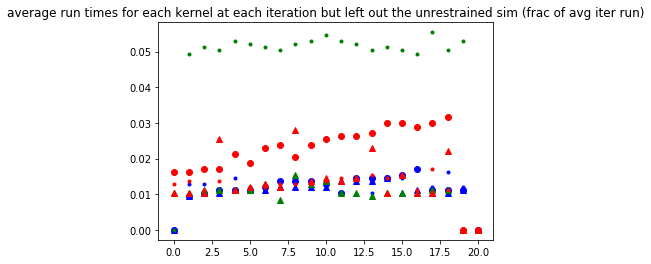

In [34]:
title="average run times for each kernel at each iteration but left out the unrestrained sim (frac of avg iter run)"
cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']
fig = plt.figure()
#plt.xlim((-15, 20))
#plt.ylim((-11, 15))
plt.title(title)
#fig.text(-0.1,-0.2,cap)
for i in range(len(ktime)):
    for j in range(len(ktime[0])):
    #print i
        if j != 5:
            plt.plot(i , ktime[i][j]/ktot_avg , cul[j])

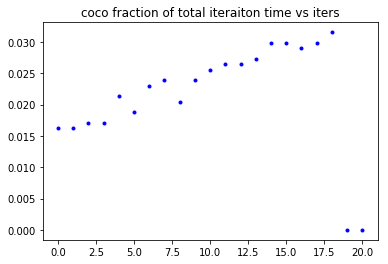

In [35]:
title="coco fraction of total iteraiton time vs iters"
cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']
fig = plt.figure()
#plt.xlim((-15, 20))
#plt.ylim((-11, 15))
plt.title(title)
#fig.text(-0.1,-0.2,cap)
for i in range(len(ktime)):
    plt.plot(i , ktime[i][-1]/ktot_avg , cul[0])

In [262]:

pdbload = '../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb'
pdb_obj_3 = md.load(pdbload, top)
print type(pdb_obj_3)
po3_fasu = Fasu(pdb_obj_3)
print type(po3_fasu)
po3_cofasu = Cofasu(po3_fasu)
print type(po3_cofasu)
print po3_cofasu.shape
print c.shape

from MDPlus import fastfitting
target_structure = po3_cofasu[0]
rmsds = fastfitting.rmsd_traj(c, target_structure)
print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())


<class 'mdtraj.core.trajectory.Trajectory'>
<class 'MDPlus.core.Fasu'>
<class 'MDPlus.core.Cofasu'>
(1, 58, 3)
(103125, 58, 3)
The closest match to the target was snapshot 11155 with rmsd 0.49 angstroms


In [57]:
bptigro_path = "/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/p07e01_k12_00100_k34_01000_itx2/inp_files/bpti.gro"
bptiO = md.load(bptigro_path, top)
bO_fasu = Fasu(bptiO)
bO_cofasu = Cofasu(bO_fasu)




pdbload = '../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb'
pdb_obj_3 = md.load(pdbload, top)
print type(pdb_obj_3)
po3_fasu = Fasu(pdb_obj_3)
print type(po3_fasu)
po3_cofasu = Cofasu(po3_fasu)
print type(po3_cofasu)
print po3_cofasu.shape
print c.shape

from MDPlus import fastfitting
target_structure = po3_cofasu[0]
rmsds = fastfitting.rmsd_traj(bO_cofasu, target_structure)
print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())


<class 'mdtraj.core.trajectory.Trajectory'>
<class 'MDPlus.core.Fasu'>
<class 'MDPlus.core.Cofasu'>
(1, 58, 3)
(103125, 58, 3)
The closest match to the target was snapshot 0 with rmsd  nan angstroms


In [72]:
bptigro_path = "../bpti/atmosphere_rsync/p07e01_k12_00100_k34_01000_itx2/inp_files/bpti.gro"
bptiO = md.load(bptigro_path, top)
bO_fasu = Fasu(bptiO)
bO_cofasu = Cofasu(bO_fasu)
print " "
print "bO"
print type(bO_cofasu)
print "shape bO_cofasu"
print bO_cofasu.shape
print "type c "
print type(c)
print "c.shape"
print c.shape
print " "


pdbload = '../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb'
pdb_obj_3 = md.load(pdbload, top)
#print type(pdb_obj_3)
po3_fasu = Fasu(pdb_obj_3)
#print type(po3_fasu)
po3_cofasu = Cofasu(po3_fasu)
print "po3_cofasu type"
print type(po3_cofasu)
print "shape po3_cofasu"
print po3_cofasu.shape
#print c.shape

from MDPlus import fastfitting
target_structure = po3_cofasu[0]
#target_structure = bO_cofasu
rmsds = fastfitting.rmsd_traj(bO_cofasu, target_structure)
print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())


 
bO
<class 'MDPlus.core.Cofasu'>
shape bO_cofasu
(1, 20521, 3)
type c 
<class 'MDPlus.core.Cofasu'>
c.shape
(103125, 58, 3)
 
po3_cofasu type
<class 'MDPlus.core.Cofasu'>
shape po3_cofasu
(1, 58, 3)
The closest match to the target was snapshot 0 with rmsd  nan angstroms


In [73]:
bptigro_path = "../bpti/atmosphere_rsync/p07e01_k12_00100_k34_01000_itx2/inp_files/bpti.gro"
bptiO = md.load(bptigro_path, top)
bO_fasu = Fasu(bptiO)
bO_cofasu = Cofasu(bO_fasu)
print " "
print "bO"
print type(bO_cofasu)
print "shape bO_cofasu"
print bO_cofasu.shape
print "type c "
print type(c)
print "c.shape"
print c.shape
print " "


pdbload = '../bpti/protein_pdb/5pti.pdb'
pdb_obj_3 = md.load(pdbload, top)
#print type(pdb_obj_3)
po3_fasu = Fasu(pdb_obj_3)
#print type(po3_fasu)
po3_cofasu = Cofasu(po3_fasu)
print "po3_cofasu type"
print type(po3_cofasu)
print "shape po3_cofasu"
print po3_cofasu.shape
#print c.shape

from MDPlus import fastfitting
target_structure = po3_cofasu[0]
#target_structure = bO_cofasu
rmsds = fastfitting.rmsd_traj(bO_cofasu, target_structure)
print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())


 
bO
<class 'MDPlus.core.Cofasu'>
shape bO_cofasu
(1, 20521, 3)
type c 
<class 'MDPlus.core.Cofasu'>
c.shape
(103125, 58, 3)
 
po3_cofasu type
<class 'MDPlus.core.Cofasu'>
shape po3_cofasu
(1, 1087, 3)
The closest match to the target was snapshot 0 with rmsd  nan angstroms


In [60]:
bptigro_path = '../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb'
bptiO = md.load(bptigro_path, top)
bO_fasu = Fasu(bptiO)
bO_cofasu = Cofasu(bO_fasu)




pdbload = '../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb'
pdb_obj_3 = md.load(pdbload, top)
print type(pdb_obj_3)
po3_fasu = Fasu(pdb_obj_3)
print type(po3_fasu)
po3_cofasu = Cofasu(po3_fasu)
print type(po3_cofasu)
print po3_cofasu.shape
print c.shape

from MDPlus import fastfitting
target_structure = po3_cofasu[0]
rmsds = fastfitting.rmsd_traj(bO_cofasu, target_structure)
print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())


<class 'mdtraj.core.trajectory.Trajectory'>
<class 'MDPlus.core.Fasu'>
<class 'MDPlus.core.Cofasu'>
(1, 58, 3)
(103125, 58, 3)
The closest match to the target was snapshot 0 with rmsd 0.00 angstroms


In [70]:
bptigro_path = "/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/p07e01_k12_00100_k34_01000_itx2/inp_files/bpti.gro"
bptiO = md.load(bptigro_path, top)
bO_fasu = Fasu(bptiO)
bO_cofasu = Cofasu(bO_fasu)




pdbload = "/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/p07e01_k12_00100_k34_01000_itx2/inp_files/bpti.gro"
pdb_obj_3 = md.load(pdbload, top)
print type(pdb_obj_3)
po3_fasu = Fasu(pdb_obj_3)
print type(po3_fasu)
po3_cofasu = Cofasu(po3_fasu)
print type(po3_cofasu)
print po3_cofasu.shape
print c.shape

from MDPlus import fastfitting
target_structure = po3_cofasu[0]
rmsds = fastfitting.rmsd_traj(bO_cofasu, target_structure)
print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())


<class 'mdtraj.core.trajectory.Trajectory'>
<class 'MDPlus.core.Fasu'>
<class 'MDPlus.core.Cofasu'>
(1, 20521, 3)
(103125, 58, 3)
The closest match to the target was snapshot 0 with rmsd 0.00 angstroms


In [64]:
deshaw_pdb_workingdir = '/home/feb23/Documents/jha/extasy/bpti/protein_pdb'
pdb3 = '1187409s_pdb3.pdb'

pdbload = deshaw_pdb_workingdir +'/'+pdb3
#pdbload = '../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb'
po3L = md.formats.PDBTrajectoryFile(pdbload, mode='r')
print type(po3L)
#print po3L.positions
#print po3L.positions

#print po3L.topology
print po3L.topology.select("name CA")

# note needed list of CA atoms to make an index list so that I could use
# mdconvert to make CA only pdb files from the DE Shaw supplied PDB files 
# figuring out how to do that took way too long ... 
# example unix command line to run in dir protein_pdb/
# mdconvert -o CA_1187409s_pdb5.pdb -a index.txt  1187409s_pdb5.pdb

<class 'mdtraj.formats.pdb.pdbfile.PDBTrajectoryFile'>
[  1  27  41  53  73  83 102 117 131 145 166 180 187 201 211 233 243 267
 286 305 329 350 370 391 405 415 437 447 454 473 483 500 514 534 550 571
 578 585 595 619 629 651 675 689 703 723 745 756 766 781 793 803 820 844
 858 868 875 882]
